In [1]:
import pandas as pd
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', 255)
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = "browser"
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import optuna

In [2]:
df = pd.read_csv(r'C:\Users\Yigit\Desktop\env_uni\Codes\Fraud\creditcard.csv')

In [4]:
target = 'Class'

In [3]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df[target].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
X = df.drop(columns = [target])
X_Cols = X.columns
y = df[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [9]:
y.value_counts(),y_test.value_counts(), y_train.value_counts()

(0    284315
 1       492
 Name: Class, dtype: int64,
 0    56864
 1       98
 Name: Class, dtype: int64,
 0    227451
 1       394
 Name: Class, dtype: int64)

In [10]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [11]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import make_scorer, balanced_accuracy_score, plot_confusion_matrix,f1_score,matthews_corrcoef

best_score = 31
max_evals = 200

"""
OPTUNA_EARLY_STOPING = 10

class EarlyStoppingExceeded(optuna.exceptions.OptunaError):
    early_stop = OPTUNA_EARLY_STOPING
    early_stop_count = 0
    best_score = None

def early_stopping_opt(study, trial):
    if EarlyStoppingExceeded.best_score == None:
        EarlyStoppingExceeded.best_score = study.best_value

    if study.best_value < EarlyStoppingExceeded.best_score:
        EarlyStoppingExceeded.best_score = study.best_value
        EarlyStoppingExceeded.early_stop_count = 0
    else:
        if EarlyStoppingExceeded.early_stop_count > EarlyStoppingExceeded.early_stop:
            EarlyStoppingExceeded.early_stop_count = 0
            best_score = None
            raise EarlyStoppingExceeded()
        else:
            EarlyStoppingExceeded.early_stop_count=EarlyStoppingExceeded.early_stop_count+1
    #print(f'EarlyStop counter: {EarlyStoppingExceeded.early_stop_count}, Best score: {study.best_value} and {EarlyStoppingExceeded.best_score}')
    return
"""


import lightgbm as lgb


# FYI: Objective functions can take additional arguments
def objective(trial):
    global best_score
    
#{'boosting_type' : trial.suggest_categorical("boosting_type", ["gbdt", "rf", "dart", "goss"]),
    param= {'num_leaves': trial.suggest_int("num_leaves", 3,300),
            'learning_rate': trial.suggest_float("learning_rate",0.001,0.99),
            'max_depth': trial.suggest_int("max_depth", 3,300),

            'boosting_type' : trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"]),
            'n_estimators': trial.suggest_int("n_estimators", 5,300)}
        
    model = lgb.LGBMClassifier(**param)
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #score = sqrt(mean_squared_error(y_train, y_train_pred))
    #score = mean_absolute_error(y_train, y_train_pred)
    score = matthews_corrcoef(y_train, y_train_pred) + 30* matthews_corrcoef(y_test, y_test_pred)

    #score2 = matthews_corrcoef(y_test, y_test_pred)
    #score3 = f1_score(y_test, y_test_pred, average='macro')

    #y_pred = model.predict(X_test)
    #score = -np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    #score = np.sqrt(np.mean(np.square(y_train_pred - y_train)))
    #score = (score1 + score2)/2

    if (score > best_score):
        best_score = score
    return score



study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=max_evals)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Best Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

model = lgb.LGBMClassifier(random_state=1, max_depth = int(trial.params['max_depth']),
                                          learning_rate = float(trial.params['learning_rate']),
                                          num_leaves = int(trial.params['num_leaves']),
                                          boosting_type = str(trial.params['boosting_type']),
                                          n_estimators = int(trial.params['n_estimators']))

#boosting_type = str(trial.params['boosting_type'])


model.fit(X_train,y_train)



y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

                        
# view accuracy
#rmse_train = sqrt(mean_squared_error(y_pred_train, y_train))
#rmse_test = sqrt(mean_squared_error(y_pred_test, y_test))
#mae_train = mean_absolute_error(y_train, y_pred_train)
#mae_test = mean_absolute_error(y_test, y_pred_test)

#print('Model Train RMSE score: {0:0.4f}'.format(rmse_train))
#print('Model Test RMSE score: {0:0.4f}'.format(rmse_test))
#print('Model Train MAE score: {0:0.4f}'.format(mae_train))
#print('Model Test MAE score: {0:0.4f}'.format(mae_test))


#print('Mean of Dataset:')
#print(df[target].mean())
#print('Max Value of Dataset:')
#print(max(df[target]))
#print('Min Value of Dataset:')
#print(min(df[target]))

# sorted(zip(clf.featuNre_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_Cols)), columns=['Value','Feature'])
feature_imp = feature_imp.sort_values(by="Value", ascending=False)

import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

plt.figure(figsize=(30, 60))
sns.barplot(x="Value", y="Feature", data=feature_imp[:100])
plt.title('Feature Importance')
plt.show()

filename = r'C:\Users\Yigit\Desktop\env_uni\Codes\Fraud\Model\LGBMClassifier'
import joblib
#save model
joblib.dump(model, filename) 


[I 2022-03-05 18:36:47,794] A new study created in memory with name: no-name-0399ac34-d870-47ac-bc4c-7f9ca6ad65fc
[I 2022-03-05 18:36:53,086] Trial 0 finished with value: 8.299681881907334 and parameters: {'num_leaves': 147, 'learning_rate': 0.20709028316775685, 'max_depth': 48, 'boosting_type': 'dart', 'n_estimators': 32}. Best is trial 0 with value: 8.299681881907334.
[I 2022-03-05 18:36:57,817] Trial 1 finished with value: -0.7165017127659519 and parameters: {'num_leaves': 218, 'learning_rate': 0.9626927294993775, 'max_depth': 155, 'boosting_type': 'gbdt', 'n_estimators': 157}. Best is trial 0 with value: 8.299681881907334.
[I 2022-03-05 18:37:02,396] Trial 2 finished with value: 2.6437232625687894 and parameters: {'num_leaves': 139, 'learning_rate': 0.7443515217462029, 'max_depth': 64, 'boosting_type': 'dart', 'n_estimators': 157}. Best is trial 0 with value: 8.299681881907334.
[I 2022-03-05 18:37:06,535] Trial 3 finished with value: -0.05153305833427972 and parameters: {'num_leave

Model accuracy score Test: 0.9994
Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.9994
Balanced Accuracy Train
0.998730964467005
Balanced Accuracy Test
0.8519968517795413
Train
F1 Score Macro
0.9993635768493322
F1 Score Micro
0.9999956110513727
F1 Score Weighted
0.9999956082677922
MCC Score 
0.9987279627409584
Test
F1 Score Macro
0.9010133427758795
F1 Score Micro
0.999403110845827
F1 Score Weighted
0.999361530383885
MCC Score 
0.809980051624089


c:\Users\Yigit\Desktop\env_uni\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Yigit\Desktop\env_uni\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


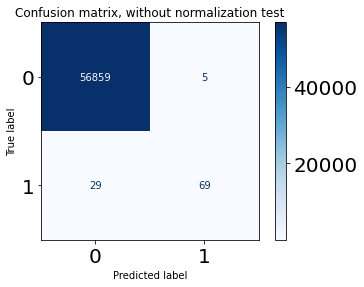

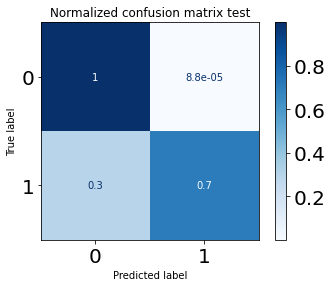

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.70      0.80        98

    accuracy                           1.00     56962
   macro avg       0.97      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



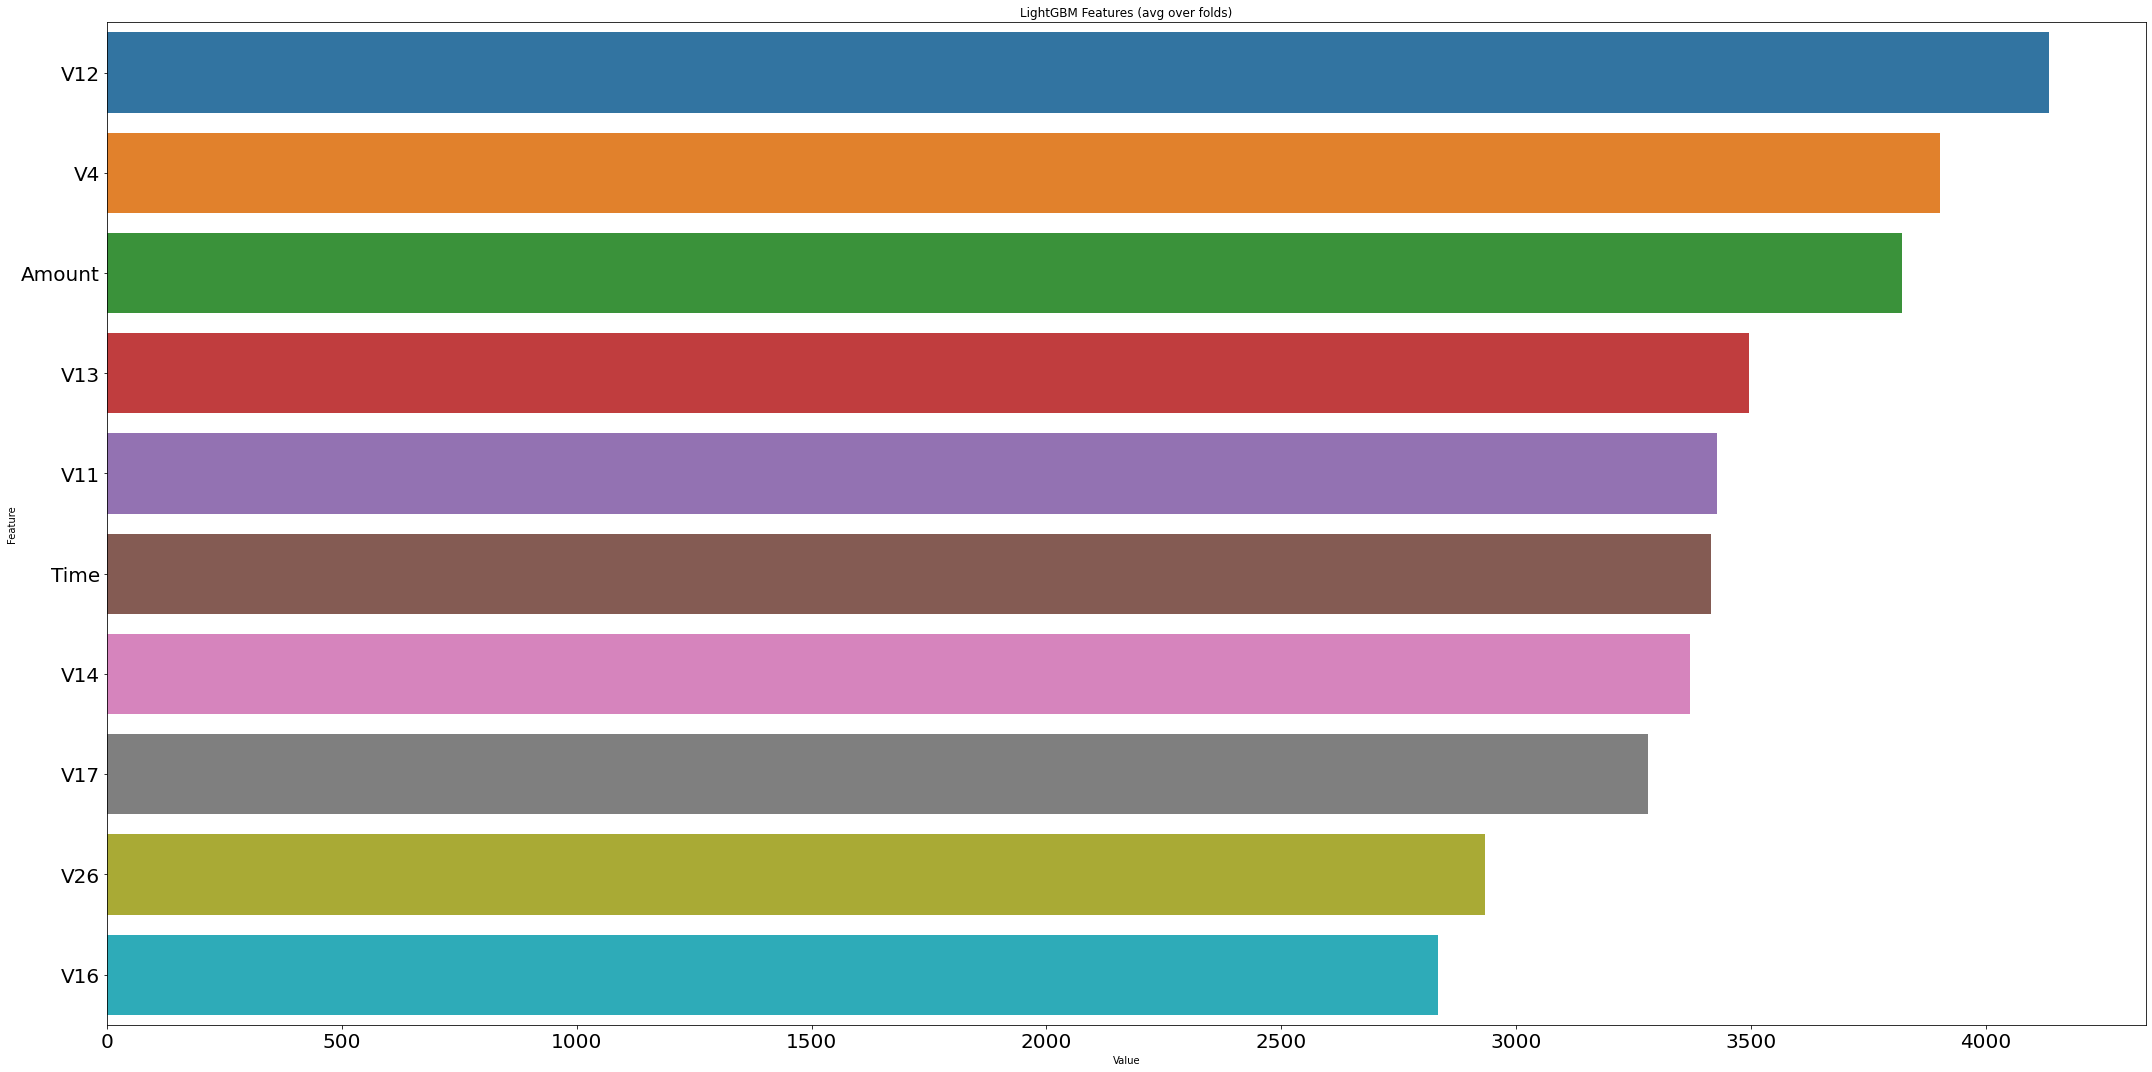

c:\Users\Yigit\Desktop\env_uni\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Yigit\Desktop\env_uni\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


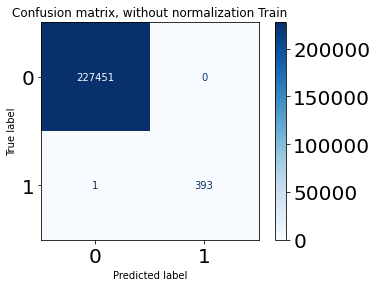

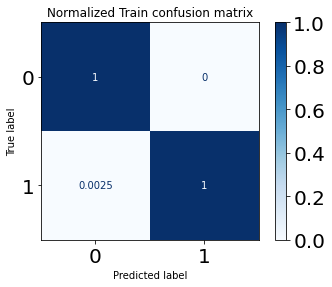

In [15]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
#accuracy=accuracy_score(y_pred_test, y_test)
print('Model accuracy score Test: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

y_pred_train = model.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

"""
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
"""
y_train_pred = model.predict(X_train)
print("Balanced Accuracy Train")
print(balanced_accuracy_score(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print("Balanced Accuracy Test")
print(balanced_accuracy_score(y_test, y_test_pred))
# visualize confusion matrix with seaborn heatmap

print("Train")
print("F1 Score Macro")
print(f1_score(y_train, y_train_pred, average='macro'))
print("F1 Score Micro")
print(f1_score(y_train, y_train_pred, average='micro'))  
print("F1 Score Weighted")
print(f1_score(y_train, y_train_pred, average='weighted')) 
print("MCC Score ")
print(matthews_corrcoef(y_train, y_train_pred)) 


print("Test")
print("F1 Score Macro")
print(f1_score(y_test, y_test_pred, average='macro'))
print("F1 Score Micro")
print(f1_score(y_test, y_test_pred, average='micro'))  
print("F1 Score Weighted")
print(f1_score(y_test, y_test_pred, average='weighted')) 
print("MCC Score ")
print(matthews_corrcoef(y_test, y_test_pred)) 


np.set_printoptions(precision=2)

class_names = [0 , 1]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization test", None),
                  ("Normalized confusion matrix test", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.grid(False)

    #print(title)
    #print(disp.confusion_matrix)
plt.grid(False)

plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))


# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_Cols)), columns=['Value','Feature'])
feature_imp = feature_imp.sort_values(by="Value", ascending=False)
plt.figure(figsize=(30, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp[:10])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()



#class_names = ["NOK" , "OK"]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization Train", None),
                  ("Normalized Train confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.grid(False)

    #print(title)
    #print(disp.confusion_matrix)
plt.grid(False)

plt.show()




In [100]:
optuna.visualization.plot_param_importances(study)

In [101]:
optuna.visualization.plot_optimization_history(study)

In [102]:
optuna.visualization.plot_slice(study)

In [103]:
optuna.visualization.plot_slice(study, ['learning_rate'])

In [104]:
optuna.visualization.plot_contour(study, ['learning_rate', 'n_estimators'])

In [105]:
import sys
print(sys.version)

3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]


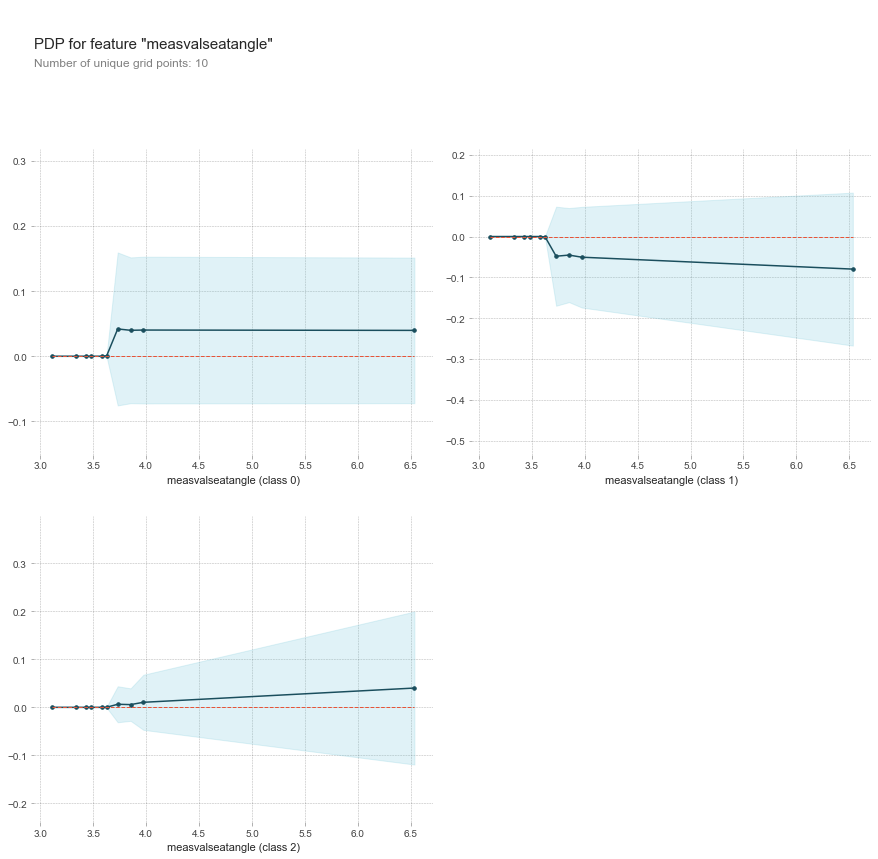

In [106]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model, dataset=df_features,
                            model_features=X_Cols, feature='mean')

# plot it
pdp.pdp_plot(pdp_goals, 'measvalseatangle')
plt.show()


In [107]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [108]:
feat_imp = pd.DataFrame({'features': X_train.columns.tolist(), "mean_decrease_impurity": model.feature_importances_}).sort_values('mean_decrease_impurity', ascending=False)
feat_imp = feat_imp.head(25)
feat_imp.iplot(kind='bar',
               y='mean_decrease_impurity',
               x='features',
               yTitle='Mean Decrease Impurity',
               xTitle='Features',
               title='Mean Decrease Impurity',
              )

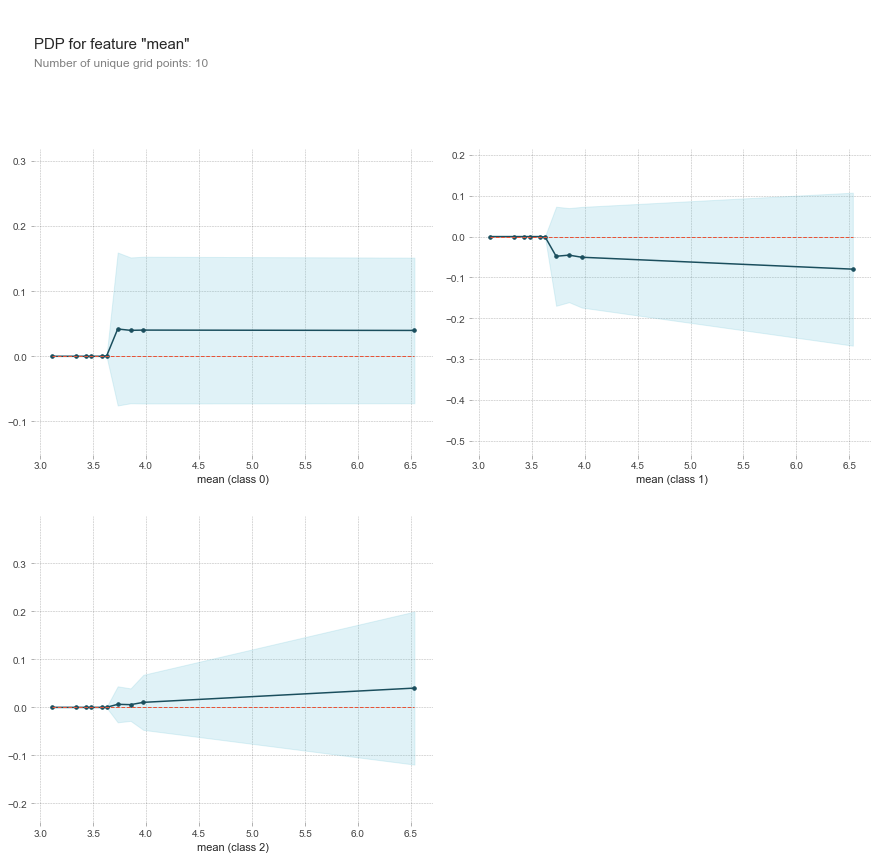

In [109]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model, dataset=df_features,
                            model_features=X_Cols, feature='mean')

# plot it
pdp.pdp_plot(pdp_goals, 'mean')
plt.show()


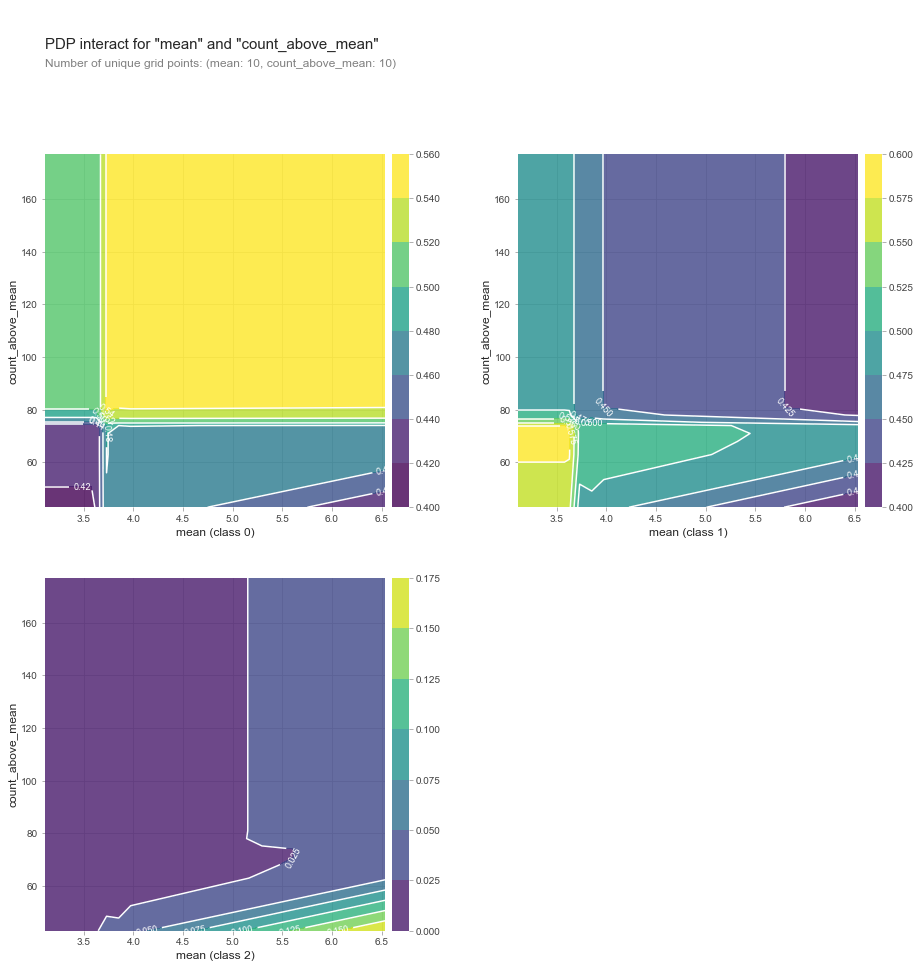

In [110]:
features_to_plot = ['mean', 'count_above_mean']
inter1 = pdp.pdp_interact(model=model, dataset=df_features, model_features=X_Cols, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show( )

NameError: name 'pdp_interaction' is not defined

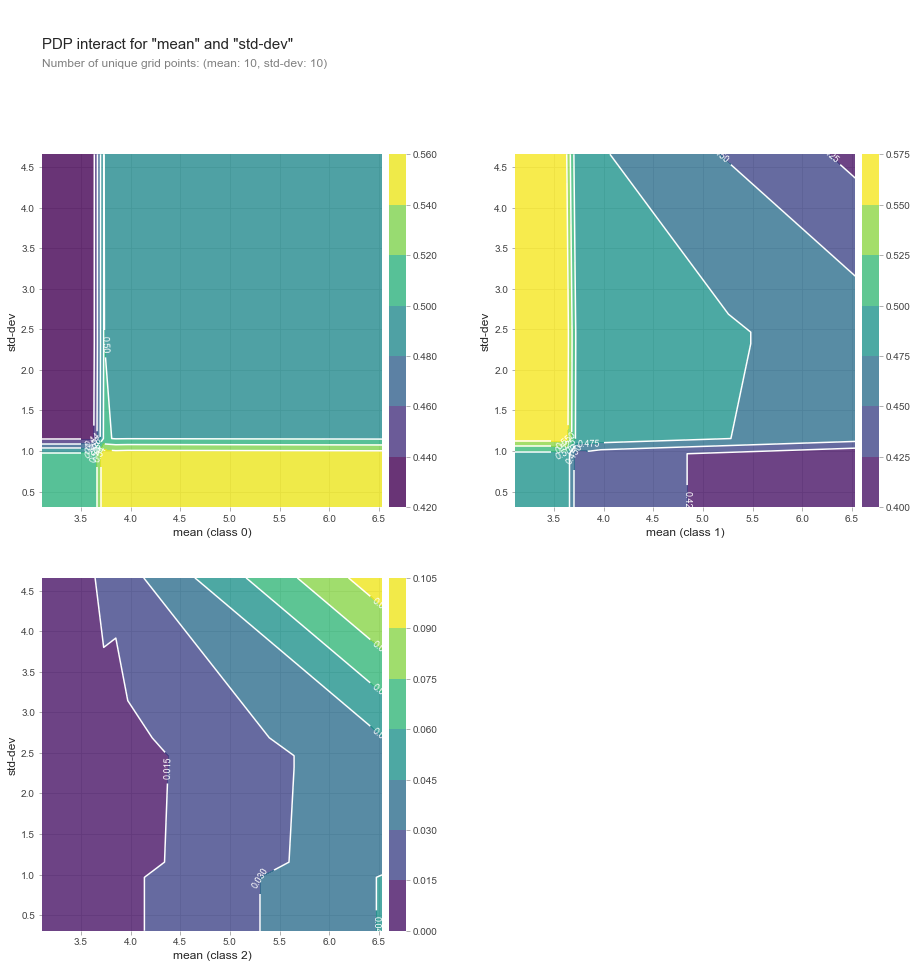

In [113]:
# figure size in inches
plt.rcParams['figure.figsize'] = 10,13
sns.set_style("whitegrid")
pdp_interaction = pdp.pdp_interact(model=model, dataset=df_features, model_features=X_Cols, features=['mean', 'std-dev'])
pdp.pdp_interact_plot(pdp_interact_out=pdp_interaction, feature_names=['mean', 'std-dev'], plot_type='contour')

plt.show()


In [114]:
pdp_interaction

In [57]:
import plotly.express as px
fig = px.scatter(df_features, x='label', y="std-dev")
fig.show()